# Creating a Feature Array

The first part in training an model with Synference is to create a feature array from the generated model library. This feature array will be used as the training data for the inference model.

This can included any of the following:
- Normalization: Scaling the features to a common range.
- Noise modelling: Adding realistic noise to the features to simulate observational conditions.
- Customising features: Selecting specific features or combinations of features that are most relevant for the inference task.
- Adding new features: E.g. colors, supplementary parameters, or moving parameters from being inferred to being part of the features.
- Simulating missing data in the training set. 
- Transforming parameters or features to improve model performance.

First lets load the library and create a basic feature array.

In [6]:
from synference import SBI_Fitter

fitter = SBI_Fitter.init_from_hdf5(model_name="test",
                                   hdf5_path="../example_libraries/test_model_library.hdf5")

The ```create_feature_array``` method exposes some of the basic functionality for creating a feature array, but more complex feature array creation can be achieved with the ```create_feature_array_from_raw_photometry``` method.


In [7]:
?fitter.create_feature_array

Signature:
fitter.create_feature_array(
    flux_units: str = 'AB',
    extra_features: list = None,
    **kwargs,
)
Docstring:
Create a feature array from the raw observation grid.

A simpler wrapper for
`create_feature_array_from_raw_photometry` with default values.
This function will create a feature array from the raw observation grid
with no noise, and all photometry in mock catalogue used.
File:      ~/Documents/PhD/synference/src/synference/sbi_runner.py
Type:      method

So we can see that the basic functionality will create a feature array with noiseless fluxes in AB magnitudes for all filters in the library, and the parameters to be inferred will be the full set of model parameters.

In [8]:
fitter.observation_type

'photometry'

In [9]:
fitter.create_feature_array();

2025-11-04 14:39:34,949 | synference | INFO     | ---------------------------------------------
2025-11-04 14:39:34,965 | synference | INFO     | Features: 8 features over 10000 samples
2025-11-04 14:39:34,969 | synference | INFO     | ---------------------------------------------
2025-11-04 14:39:34,971 | synference | INFO     | Feature: Min - Max
2025-11-04 14:39:34,975 | synference | INFO     | ---------------------------------------------
2025-11-04 14:39:34,981 | synference | INFO     | JWST/NIRCam.F070W: 3.642582 - 43.046 AB
2025-11-04 14:39:34,983 | synference | INFO     | JWST/NIRCam.F090W: 3.246181 - 40.840 AB
2025-11-04 14:39:34,984 | synference | INFO     | JWST/NIRCam.F115W: 2.951415 - 38.513 AB
2025-11-04 14:39:34,984 | synference | INFO     | JWST/NIRCam.F150W: 2.685013 - 37.131 AB
2025-11-04 14:39:34,987 | synference | INFO     | JWST/NIRCam.F200W: 2.763217 - 35.357 AB
2025-11-04 14:39:34,988 | synference | INFO     | JWST/NIRCam.F277W: 3.175404 - 33.451 AB
2025-11-04 14

2025-11-04 14:39:36,416 | synference | INFO     | saving /Users/user/Documents/PhD/synference/models/test/plots//feature_histogram.png


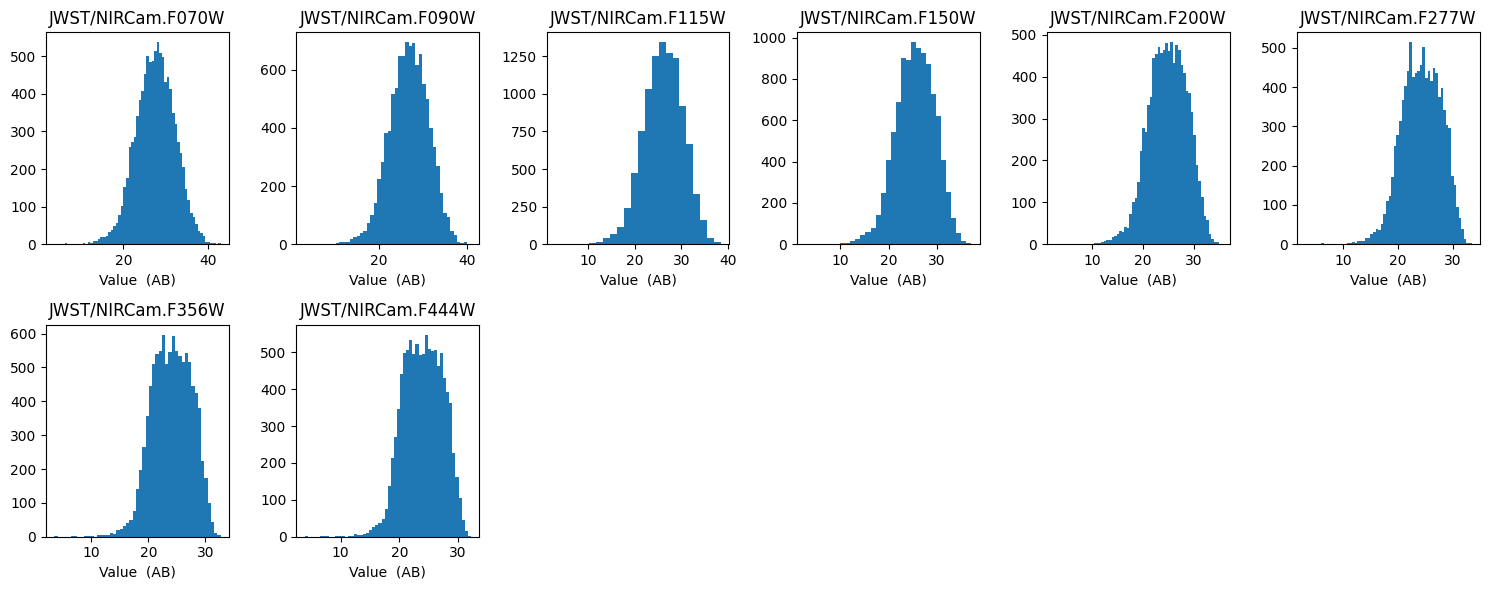

In [10]:
fitter.plot_histogram_feature_array();

Now there are some easy changes we could try out here. First, let's try changing the flux unit to log10 nJy.

2025-11-04 14:39:38,734 | synference | INFO     | ---------------------------------------------
2025-11-04 14:39:38,736 | synference | INFO     | Features: 8 features over 10000 samples
2025-11-04 14:39:38,737 | synference | INFO     | ---------------------------------------------
2025-11-04 14:39:38,740 | synference | INFO     | Feature: Min - Max
2025-11-04 14:39:38,741 | synference | INFO     | ---------------------------------------------
2025-11-04 14:39:38,742 | synference | INFO     | JWST/NIRCam.F070W: -4.658413 - 11.103 log10 nJy
2025-11-04 14:39:38,743 | synference | INFO     | JWST/NIRCam.F090W: -3.775856 - 11.262 log10 nJy
2025-11-04 14:39:38,745 | synference | INFO     | JWST/NIRCam.F115W: -2.845155 - 11.379 log10 nJy
2025-11-04 14:39:38,746 | synference | INFO     | JWST/NIRCam.F150W: -2.292593 - 11.486 log10 nJy
2025-11-04 14:39:38,746 | synference | INFO     | JWST/NIRCam.F200W: -1.582673 - 11.455 log10 nJy
2025-11-04 14:39:38,748 | synference | INFO     | JWST/NIRCam.F

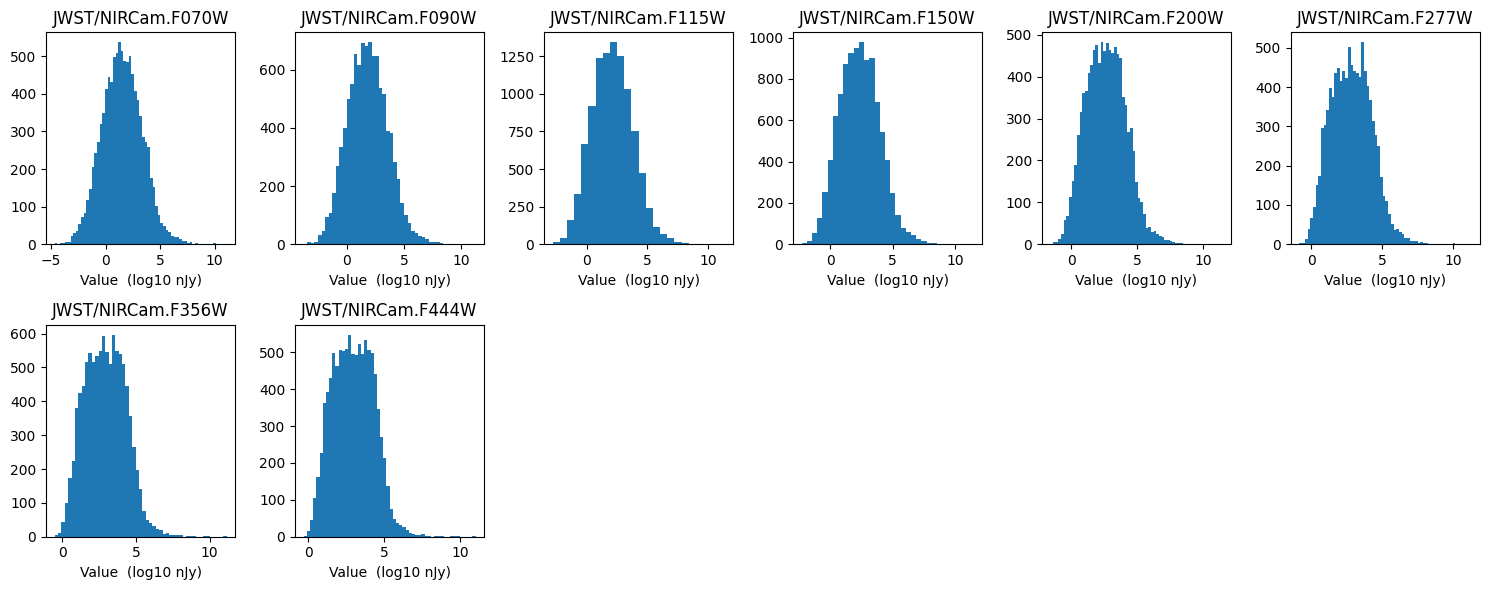

In [11]:
fitter.create_feature_array(flux_units="log10 nJy")
fitter.plot_histogram_feature_array();

We can also make it a unyt quantity by passing in ```flux_units=nJy```.

In [12]:
from unyt import nJy

fitter.create_feature_array(flux_units=nJy);

2025-11-04 14:39:41,268 | synference | INFO     | ---------------------------------------------
2025-11-04 14:39:41,269 | synference | INFO     | Features: 8 features over 10000 samples
2025-11-04 14:39:41,270 | synference | INFO     | ---------------------------------------------
2025-11-04 14:39:41,271 | synference | INFO     | Feature: Min - Max
2025-11-04 14:39:41,272 | synference | INFO     | ---------------------------------------------
2025-11-04 14:39:41,274 | synference | INFO     | JWST/NIRCam.F070W: 0.000022 - 126755669846.751 nJy
2025-11-04 14:39:41,275 | synference | INFO     | JWST/NIRCam.F090W: 0.000168 - 182611301121.886 nJy
2025-11-04 14:39:41,276 | synference | INFO     | JWST/NIRCam.F115W: 0.001428 - 239570908183.537 nJy
2025-11-04 14:39:41,277 | synference | INFO     | JWST/NIRCam.F150W: 0.005098 - 306192787777.406 nJy
2025-11-04 14:39:41,278 | synference | INFO     | JWST/NIRCam.F200W: 0.026141 - 284913547186.594 nJy
2025-11-04 14:39:41,279 | synference | INFO     

Finally we can also use asinh magnitudes, but we will need to specify a softening parameter for the asinh magnitudes. Here we will use 1 nJy.

In [13]:
fitter.create_feature_array(flux_units="asinh", asinh_softening_parameters=1 * nJy);

2025-11-04 14:39:41,312 | synference | INFO     | ---------------------------------------------
2025-11-04 14:39:41,313 | synference | INFO     | Features: 8 features over 10000 samples
2025-11-04 14:39:41,313 | synference | INFO     | ---------------------------------------------
2025-11-04 14:39:41,314 | synference | INFO     | Feature: Min - Max
2025-11-04 14:39:41,315 | synference | INFO     | ---------------------------------------------
2025-11-04 14:39:41,315 | synference | INFO     | JWST/NIRCam.F070W: 3.642647 - 31.400 asinh
2025-11-04 14:39:41,316 | synference | INFO     | JWST/NIRCam.F090W: 3.246246 - 31.400 asinh
2025-11-04 14:39:41,316 | synference | INFO     | JWST/NIRCam.F115W: 2.951480 - 31.399 asinh
2025-11-04 14:39:41,317 | synference | INFO     | JWST/NIRCam.F150W: 2.685078 - 31.397 asinh
2025-11-04 14:39:41,317 | synference | INFO     | JWST/NIRCam.F200W: 2.763283 - 31.386 asinh
2025-11-04 14:39:41,318 | synference | INFO     | JWST/NIRCam.F277W: 3.175470 - 31.318 a

We can also add features from the parameter array or colors. We can also remove some features such as fluxes in certain filters. Here we will add 'redshift' and 'F444W-F356W' color and remove the F090W filter.


In [14]:
fitter.create_feature_array(
    extra_features=["redshift", "F444W-F356W"], photometry_to_remove=["JWST/NIRCam.F090W"]
);

2025-11-04 14:39:41,330 | synference | INFO     | Removing 1 photometry filters: ['JWST/NIRCam.F090W'].
2025-11-04 14:39:41,339 | synference | INFO     | Tokenizing feature: F444W-F356W
2025-11-04 14:39:41,341 | synference | INFO     | ---------------------------------------------
2025-11-04 14:39:41,342 | synference | INFO     | Features: 9 features over 10000 samples
2025-11-04 14:39:41,343 | synference | INFO     | ---------------------------------------------
2025-11-04 14:39:41,343 | synference | INFO     | Feature: Min - Max
2025-11-04 14:39:41,343 | synference | INFO     | ---------------------------------------------
2025-11-04 14:39:41,344 | synference | INFO     | JWST/NIRCam.F070W: 3.642582 - 43.046 AB
2025-11-04 14:39:41,344 | synference | INFO     | JWST/NIRCam.F115W: 2.951415 - 38.513 AB
2025-11-04 14:39:41,344 | synference | INFO     | JWST/NIRCam.F150W: 2.685013 - 37.131 AB
2025-11-04 14:39:41,344 | synference | INFO     | JWST/NIRCam.F200W: 2.763217 - 35.357 AB
2025-11

Since most SED fitting parameters are sensitive only to colors rather than absolute fluxes, we may wish to normalise the fluxes in some way. Here we will normalise the fluxes to the F200W filter.

In [15]:
fitter.create_feature_array(normalize_method="JWST/NIRCam.F200W");

2025-11-04 14:39:41,373 | synference | INFO     | ---------------------------------------------
2025-11-04 14:39:41,374 | synference | INFO     | Features: 8 features over 10000 samples
2025-11-04 14:39:41,374 | synference | INFO     | ---------------------------------------------
2025-11-04 14:39:41,375 | synference | INFO     | Feature: Min - Max
2025-11-04 14:39:41,375 | synference | INFO     | ---------------------------------------------
2025-11-04 14:39:41,376 | synference | INFO     | JWST/NIRCam.F070W: -0.225405 - 9.739 AB
2025-11-04 14:39:41,377 | synference | INFO     | JWST/NIRCam.F090W: -0.118054 - 7.421 AB
2025-11-04 14:39:41,377 | synference | INFO     | JWST/NIRCam.F115W: -0.176115 - 4.952 AB
2025-11-04 14:39:41,378 | synference | INFO     | JWST/NIRCam.F150W: -0.195228 - 2.565 AB
2025-11-04 14:39:41,378 | synference | INFO     | JWST/NIRCam.F277W: -2.401471 - 0.658 AB
2025-11-04 14:39:41,379 | synference | INFO     | JWST/NIRCam.F356W: -3.395497 - 1.034 AB
2025-11-04 14

## Modelling Noise

We can apply a simple scatter model to the feature array to simulate observational noise. 

In [16]:
depths = 3 * nJy  # 5 sigma depth of 30.2 AB magnitudes

fitter.create_feature_array(scatter_fluxes=True, depths=depths)

2025-11-04 14:39:41,389 | synference | INFO     | Using depth-based noise models with True scatters per row.
2025-11-04 14:39:41,398 | synference | INFO     | ---------------------------------------------
2025-11-04 14:39:41,399 | synference | INFO     | Features: 8 features over 10000 samples
2025-11-04 14:39:41,399 | synference | INFO     | ---------------------------------------------
2025-11-04 14:39:41,399 | synference | INFO     | Feature: Min - Max
2025-11-04 14:39:41,400 | synference | INFO     | ---------------------------------------------
2025-11-04 14:39:41,401 | synference | INFO     | JWST/NIRCam.F070W: 3.642582 - 50.000 AB
2025-11-04 14:39:41,401 | synference | INFO     | JWST/NIRCam.F090W: 3.246181 - 50.000 AB
2025-11-04 14:39:41,402 | synference | INFO     | JWST/NIRCam.F115W: 2.951415 - 50.000 AB
2025-11-04 14:39:41,403 | synference | INFO     | JWST/NIRCam.F150W: 2.685013 - 50.000 AB
2025-11-04 14:39:41,404 | synference | INFO     | JWST/NIRCam.F200W: 2.763217 - 50.0

(array([[50.        , 26.83260118, 27.53119044, ..., 29.43387129,
         34.43797927, 21.27212023],
        [50.        , 26.00264497, 26.54642638, ..., 27.49202912,
         30.70204077, 20.28062188],
        [32.05552058, 24.86317271, 26.12276515, ..., 25.86051324,
         29.12176908, 19.71606379],
        ...,
        [30.6870075 , 23.11536972, 25.21615419, ..., 23.47721144,
         24.18101386, 18.65903248],
        [32.747379  , 23.00087026, 25.13865705, ..., 23.05253922,
         23.43145937, 18.55572095],
        [31.93493825, 22.91416391, 25.43093859, ..., 22.86763048,
         22.91648835, 18.80079323]]),
 ['JWST/NIRCam.F070W',
  'JWST/NIRCam.F090W',
  'JWST/NIRCam.F115W',
  'JWST/NIRCam.F150W',
  'JWST/NIRCam.F200W',
  'JWST/NIRCam.F277W',
  'JWST/NIRCam.F356W',
  'JWST/NIRCam.F444W'])

## Missing Fluxes

## Changing the Parameter Array

We can also change our parameter array, which is created automatically when we create the feature array. Here we will only infer 'stellar_mass'. 

2025-11-04 14:39:41,423 | synference | INFO     | ---------------------------------------------
2025-11-04 14:39:41,423 | synference | INFO     | Features: 8 features over 10000 samples
2025-11-04 14:39:41,423 | synference | INFO     | ---------------------------------------------
2025-11-04 14:39:41,424 | synference | INFO     | Feature: Min - Max
2025-11-04 14:39:41,424 | synference | INFO     | ---------------------------------------------
2025-11-04 14:39:41,424 | synference | INFO     | JWST/NIRCam.F070W: 3.642582 - 43.046 AB
2025-11-04 14:39:41,425 | synference | INFO     | JWST/NIRCam.F090W: 3.246181 - 40.840 AB
2025-11-04 14:39:41,425 | synference | INFO     | JWST/NIRCam.F115W: 2.951415 - 38.513 AB
2025-11-04 14:39:41,426 | synference | INFO     | JWST/NIRCam.F150W: 2.685013 - 37.131 AB
2025-11-04 14:39:41,427 | synference | INFO     | JWST/NIRCam.F200W: 2.763217 - 35.357 AB
2025-11-04 14:39:41,427 | synference | INFO     | JWST/NIRCam.F277W: 3.175404 - 33.451 AB
2025-11-04 14

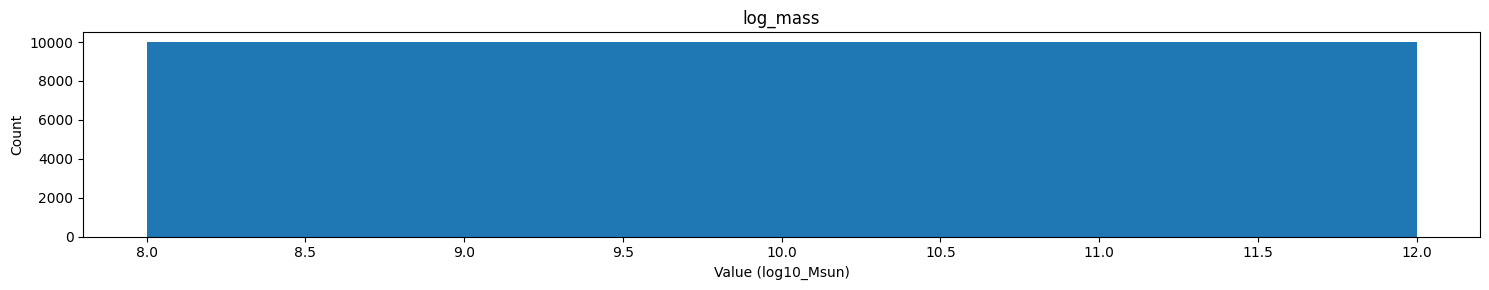

In [17]:
fitter.create_feature_array(
    parameters_to_remove=["redshift", "tau_v", "tau", "peak_age", "log10metallicity"]
)

fitter.plot_histogram_parameter_array();